In [1]:
import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import difflib


## House names translation

In this project, the distance between the original English house name and its translated version is computed using a string similarity-based metric derived from Python's `difflib.SequenceMatcher`.

The  translated names have been taken from: https://harrypotter.fandom.com/wiki/List_of_wizarding_terms_in_translations_of_Harry_Potter (**Hogwarts Houses** table). 

### Similarity Ratio

The similarity ratio between two strings is calculated as:

$$ \text{Similarity Ratio} = \frac{2 \cdot M}{T} $$

Where:
- **M** is the number of matching characters (not necessarily contiguous),
- **T** is the total number of characters in both strings combined.

This ratio lies between 0 and 1:
- 1 indicates identical strings,
- 0 indicates no similarity at all.

### Distance score formula

The similarity ratio is then converted into a distance score using the following formula:

$$ \text{Distance} = \text{round}\left((1 - \text{Similarity Ratio}) \cdot \max(\text{len}_{\text{orig}}, \text{len}_{\text{trans}})\right) $$

Where:
- **len<sub>orig</sub>** is the length of the original English house name,
- **len<sub>trans</sub>** is the length of the translated house name.

This distance score represents a normalized estimate of how different the translated name is from the original. It is used to visualize linguistic divergence across translations in the circular plots.


In [2]:

data = {
    "Language": [
        "Afrikaans", "Albanian", "Czech", "Dutch", "Finnish", "French", "Hungarian", "Italian", "Latvian",
        "Lithuanian", "Norwegian", "Portuguese (Brazil)", "Romanian", "Slovak", "Slovenian", "Welsh"
    ],
    "Gryffindor": [
        "Griffindor", "Grifarti", "Nebelvír", "Griffoendor", "Rohkelikko", "Gryffondor", "Griffendél", "Grifondoro",
        "Grifidors", "Grifų Gūžta", "Griffing", "Grifinória", "Cercetaș", "Chrabromil", "Gryfondom", "Llereurol"
    ],
    "Hufflepuff": [
        "Hoesenproes", "Baldozkuqi", "Mrzimor", "Huffelpuf", "Puuskupuh", "Poufsouffle", "Hugrabug", "Tassorosso",
        "Elšpūtis", "Švilpynė", "Håsblås", "Lufa-Lufa", "Astropuf", "Bifľomor", "Pihpuff", "Wfftitwff"
    ],
    "Ravenclaw": [
        "Rawenklou", "Korbziu", "Havraspár", "Ravenklauw", "Korpinkynsi", "Serdaigle", "Hollóhát", "Corvonero",
        "Kraukļanags", "Varno Nagas", "Ravnklo", "Corvinal", "Ochi-de-Șoim", "Bystrohlav", "Drznvraan", "Crafangfran"
    ],
    "Slytherin": [
        "Slibberin", "Gjarperblerti", "Zmijozel", "Zwadderich", "Luihuinen", "Serpentard", "Mardekár", "Serpeverde",
        "Slīdenis", "Klastūnynas", "Smygard", "Sonserina", "Viperin", "Slizolin", "Spolzgad", "Slafennog"
    ]
}

df_houses = pd.DataFrame(data)

houses = ["Gryffindor", "Slytherin", "Ravenclaw", "Hufflepuff"]
distance_data = {}

for house in houses:
    distances = []
    for translated_name in df_houses[house]:
        ratio = difflib.SequenceMatcher(None, house, translated_name).ratio()
        distance = round((1 - ratio) * max(len(house), len(translated_name)))
        distances.append(distance)
    distance_data[house] = distances

distance_df = pd.DataFrame(distance_data)
distance_df["Language"] = df_houses["Language"]
distance_df = distance_df.set_index("Language")


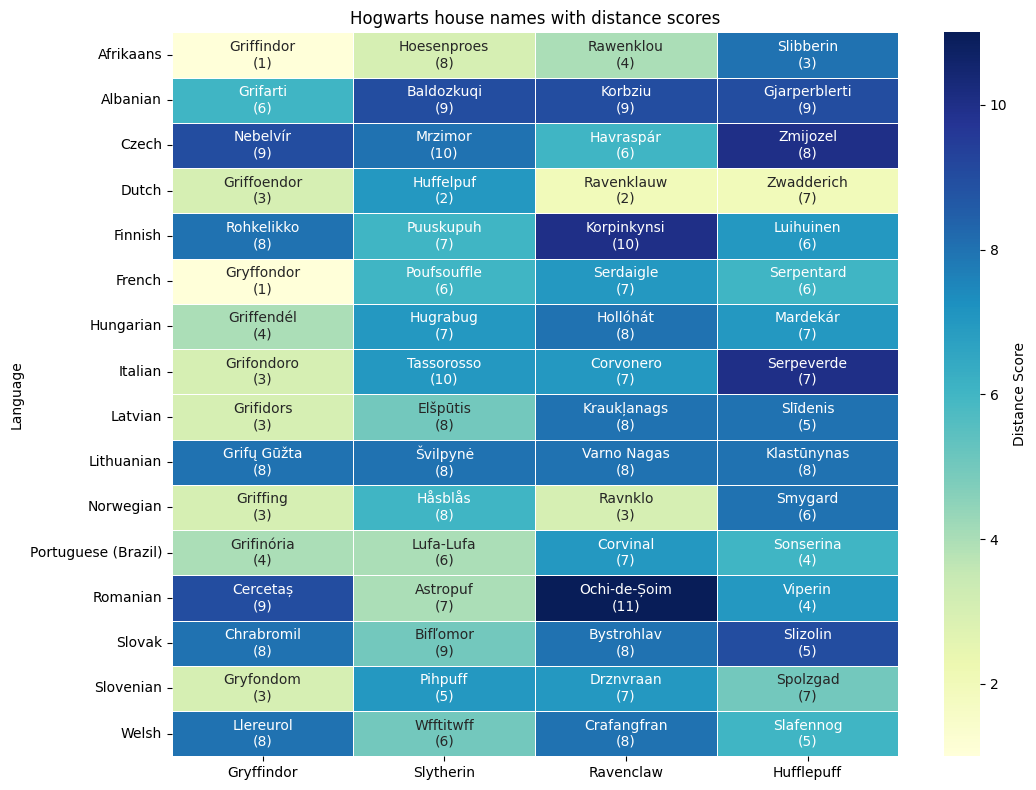

In [3]:
annot_labels = df_houses.set_index("Language").copy()

for house in houses:
    annot_labels[house] = annot_labels[house] + "\n(" + distance_df[house].astype(str) + ")"

plt.figure(figsize=(11, 8))
sns.heatmap(distance_df, annot=annot_labels, fmt="", cmap="YlGnBu", linewidths=.5,
            cbar_kws={'label': 'Distance Score'})
plt.title("Hogwarts house names with distance scores")
plt.ylabel("Language")
plt.tight_layout()


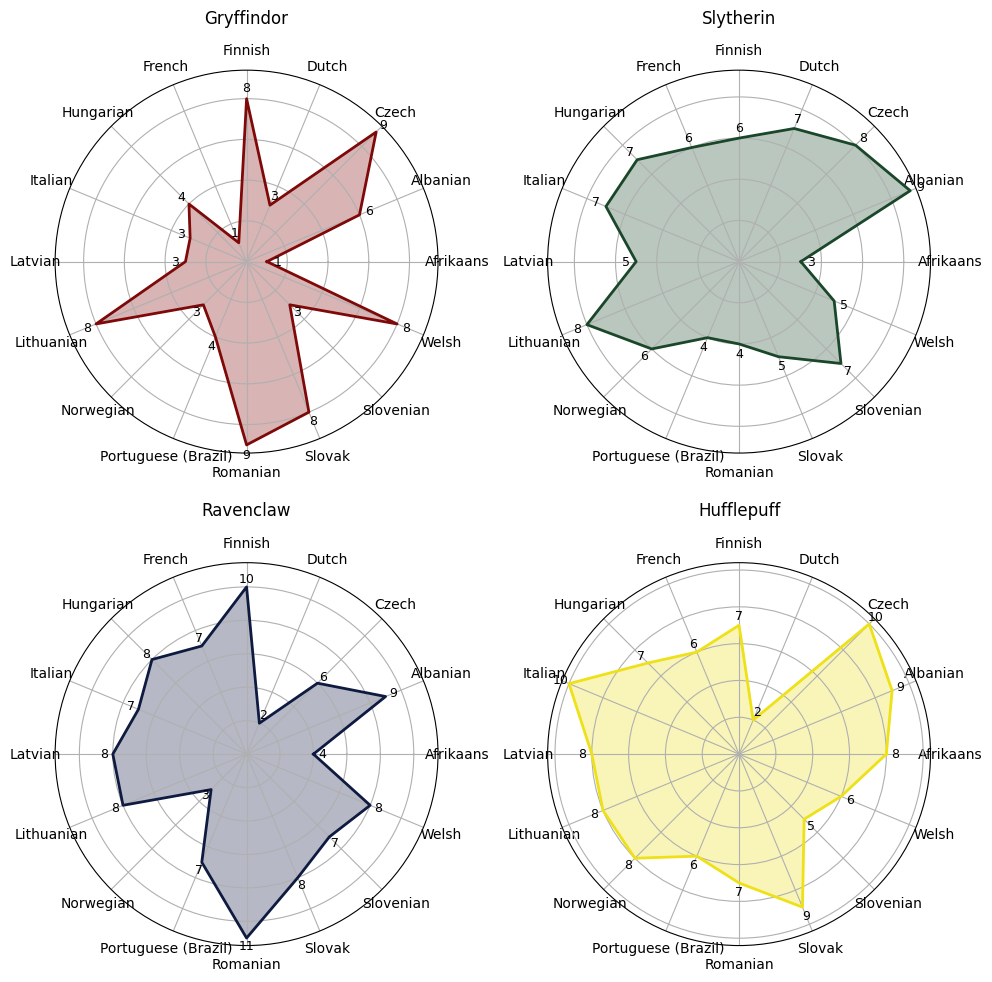

In [4]:
# house colors (from the movie)
house_colors = {
    "Gryffindor": "#7F0909", 
    "Slytherin": "#1A472A",   
    "Ravenclaw": "#0E1A40",   
    "Hufflepuff": "#EEE117"   
}

custom_colors = [
    house_colors["Gryffindor"],
    house_colors["Slytherin"],
    house_colors["Ravenclaw"],
    house_colors["Hufflepuff"]
]

# circular Bar plot 
fig, axes = plt.subplots(2, 2, figsize=(10, 10), subplot_kw={'polar': True})
axes = axes.flatten()
angles = np.linspace(0, 2 * np.pi, len(distance_df), endpoint=False).tolist()
angles += angles[:1]

for idx, house in enumerate(houses):
    ax = axes[idx]
    values = distance_df[house].tolist()
    values += values[:1]
    ax.plot(angles, values, color=custom_colors[idx], linewidth=2)
    ax.fill(angles, values, color=custom_colors[idx], alpha=0.3)

    for angle, value in zip(angles[:-1], distance_df[house]):
        ax.text(angle, value + 0.5, str(value), ha='center', va='center', fontsize=9)

    ax.set_title(f"{house}", y=1.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(distance_df.index, fontsize=10)
    ax.set_yticklabels([])
    ax.grid(True)

plt.tight_layout()



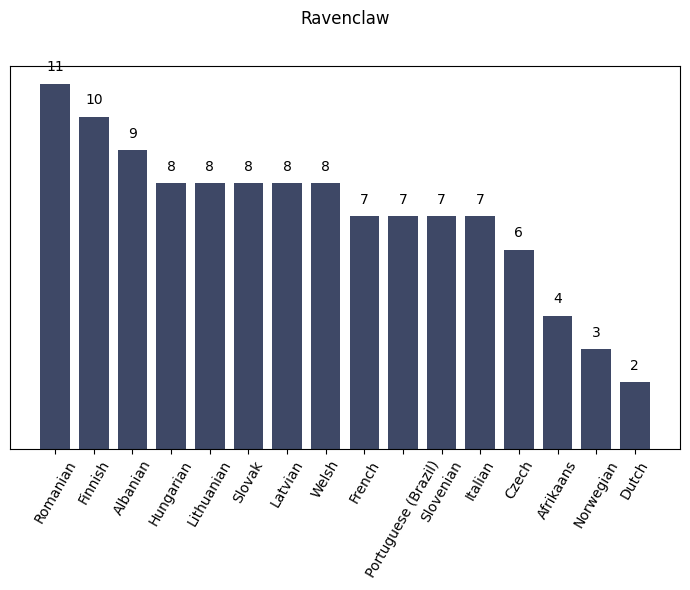

In [5]:
def plot_house_circular_heatmap(house_name, color=None):
    house_distances = distance_df[house_name].sort_values(ascending=False)
    sorted_labels = house_distances.index
    sorted_angles = np.linspace(0, 2 * np.pi, len(house_distances), endpoint=False)

    if color is None:
        color = house_colors.get(house_name, "#555555") 

    plt.figure(figsize=(7, 6))
    bars = plt.bar(sorted_angles, house_distances.values, width=0.3, alpha=0.8, label=house_name, color=color)

    plt.xticks(sorted_angles, sorted_labels, rotation=60, fontsize=10)

    for angle, value in zip(sorted_angles, house_distances.values):
        plt.text(angle, value + 0.5, str(value), ha='center', va='center', fontsize=10)

    plt.title(house_name, pad=30)
    plt.yticks([])
    plt.tight_layout()

plot_house_circular_heatmap("Ravenclaw")

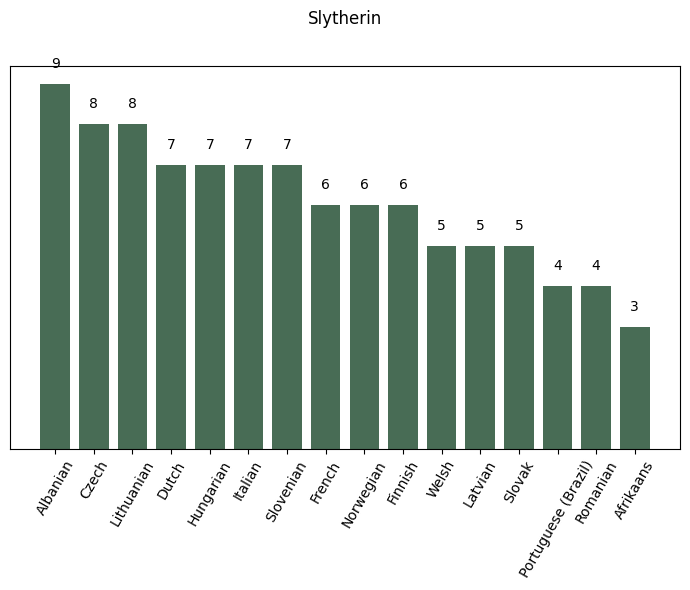

In [6]:

plot_house_circular_heatmap("Slytherin")

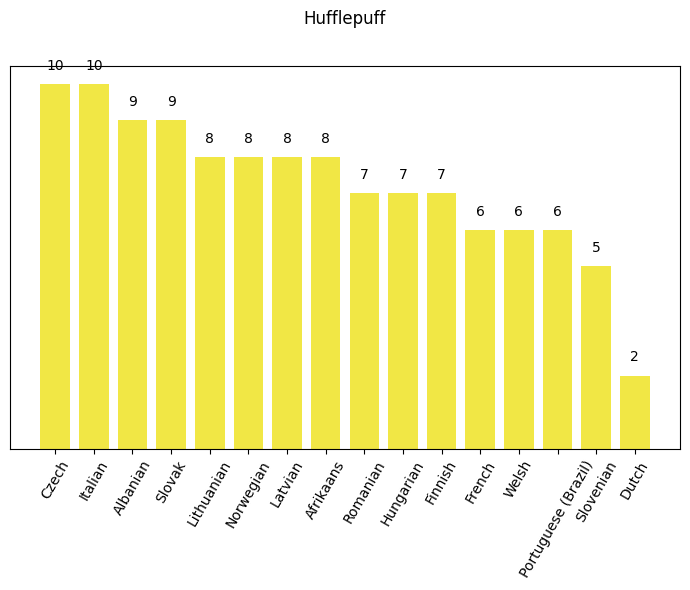

In [7]:

plot_house_circular_heatmap("Hufflepuff")


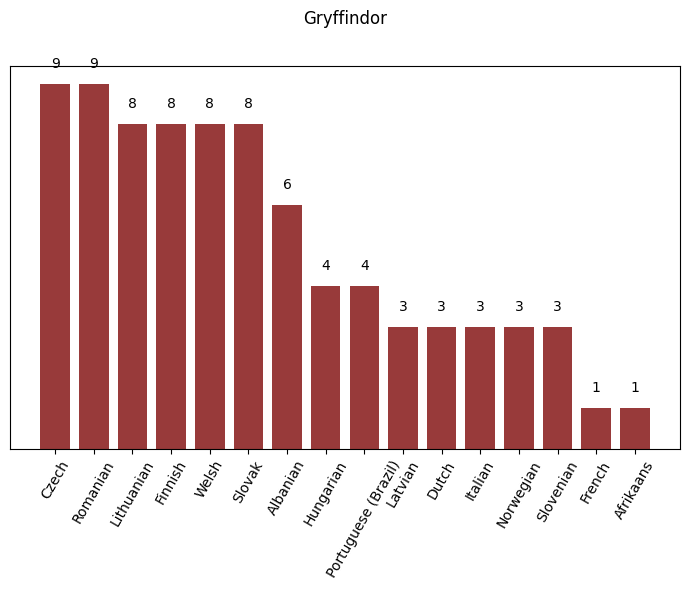

In [8]:

plot_house_circular_heatmap("Gryffindor")
